In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pl_upto20 = pd.read_csv("More_player_stat.csv")

# Filter the data for the 2022 season
season_2022_data = pl_upto20[pl_upto20['Season'] == 2021]

# so I want to create a dashboard, that would also be pick a player and I have a summary of their applied stats

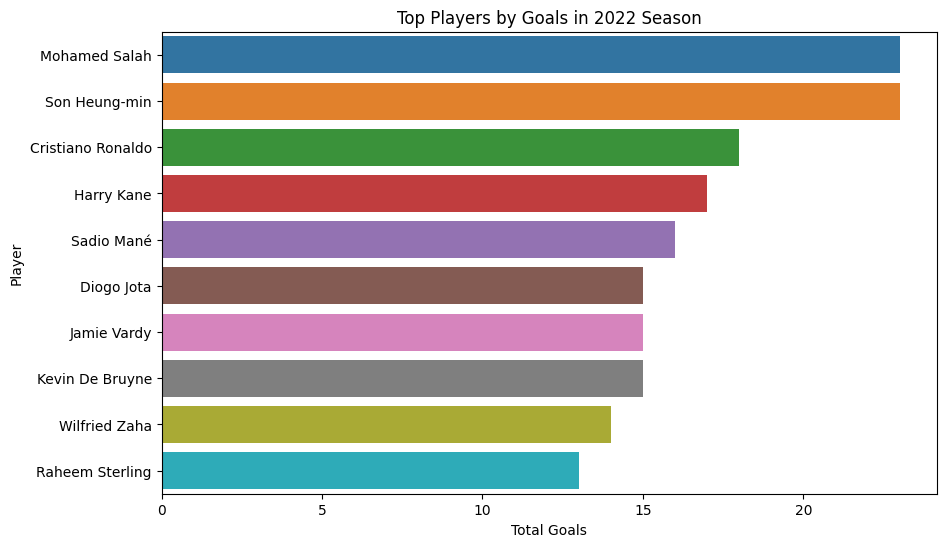

In [35]:
# Filter out rows with unwanted player names
filtered_data = season_2022_data[
    ~season_2022_data['player'].isin(['Opponent Total', 'Squad Total'])
]

# Calculate the sum of goals for each player and find the top 10
player_most_goals = filtered_data.groupby('player')['gls'].sum().nlargest(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the bar plot using Seaborn
sns.barplot(x=player_most_goals.values, y=player_most_goals.index)

# Add labels and title
plt.xlabel('Total Goals')
plt.ylabel('Player')
plt.title('Top Players by Goals in 2022 Season')

# Display the plot
plt.show()

In [36]:
# Calculate the sum of goals for each player and find the top 10
player_most_assits = filtered_data.groupby('player')['ast'].sum().nlargest(10)
player_most_assits

player
Mohamed Salah             13.0
Trent Alexander-Arnold    12.0
Andrew Robertson          10.0
Harvey Barnes             10.0
Jarrod Bowen              10.0
Mason Mount               10.0
Harry Kane                 9.0
Paul Pogba                 9.0
Reece James                9.0
Dejan Kulusevski           8.0
Name: ast, dtype: float64

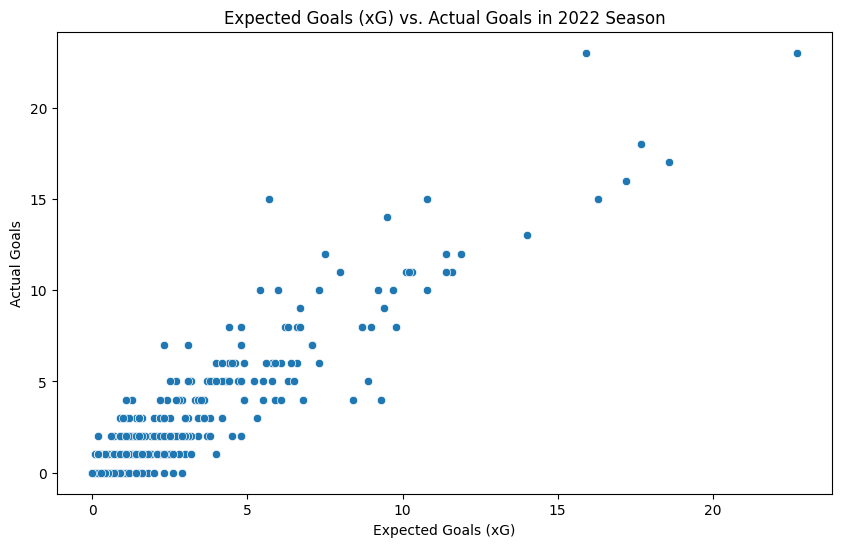

In [38]:
filtered_data = season_2022_data[
    ~season_2022_data['player'].isin(['Opponent Total', 'Squad Total'])
]

# Create a scatter plot for Expected Goals (xG) vs. Actual Goals
plt.figure(figsize=(10, 6))

sns.scatterplot(x='xg', y='gls', data=filtered_data)
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.title('Expected Goals (xG) vs. Actual Goals in 2022 Season')

plt.show()

In [65]:
import dash
from dash import dcc 
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import dash_bootstrap_components as dbc

app = dash.Dash()

data = pd.read_csv("More_player_stat.csv")

# Define layout
app.layout = html.Div([
    dbc.Row([
        dbc.Col(dcc.Dropdown(
            id='player-dropdown', 
            options=[{'label': player, 'value': player} for player in data['player'].unique()],
            value=data['player'].iloc[0] 
        )),
        dbc.Col(dcc.Dropdown(
            id='season-dropdown',
            options=[{'label': str(season), 'value': season} for season in data['Season'].unique()],
            value=data['Season'].iloc[0]
        )),
        dbc.Col(dcc.Dropdown(
            id='team-dropdown',
            options=[{'label': team, 'value': team} for team in data['Team'].unique()],
            value=data['Team'].iloc[0]
        )),
    ]),
    html.Div(id='player-summary')
])

# Callback to update player dropdown based on team  
@app.callback(
    Output('player-dropdown', 'options'),
    [Input('team-dropdown', 'value')]
)
def update_player_options(selected_team):
    if selected_team is None:
        player_options = [{'label': player, 'value': player} for player in data['player'].unique()]
    else:
        player_options = [{'label': player, 'value': player} for player in data[data['Team'] == selected_team]['player'].unique()]
    return player_options

# Callback to update player summary 
@app.callback(
    Output('player-summary', 'children'),
    [Input('player-dropdown', 'value'),
     Input('season-dropdown', 'value'),
     Input('team-dropdown', 'value')]
)
def update_player_summary(selected_player, selected_season, selected_team):
    player_data = data[(data['player'] == selected_player) & 
                       (data['Season'] == selected_season) &
                       (data['Team'] == selected_team)]
                       
    gls_per_match = player_data['gls'].sum() / player_data['mp'].sum()
    
    summary = html.Div([
        html.H4(f"Summary for {selected_player} in {selected_season}"),
        html.P(f"Goals per Match: {gls_per_match:.2f}")
    ])
    
    return summary

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on
